In [1]:
#%% import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
mean = np.around(np.mean(df['horsepower']),1)
df['horsepower'].fillna(mean,inplace = True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000,-0.775,-0.804,-0.771,-0.832,0.420,0.579
cylinders,-0.775,1.000,0.951,0.839,0.896,-0.505,-0.349
displacement,-0.804,0.951,1.000,0.894,0.933,-0.544,-0.370
horsepower,-0.771,0.839,0.894,1.000,0.861,-0.684,-0.412
weight,-0.832,0.896,0.933,0.861,1.000,-0.417,-0.307
acceleration,0.420,-0.505,-0.544,-0.684,-0.417,1.000,0.288
model year,0.579,-0.349,-0.370,-0.412,-0.307,0.288,1.000


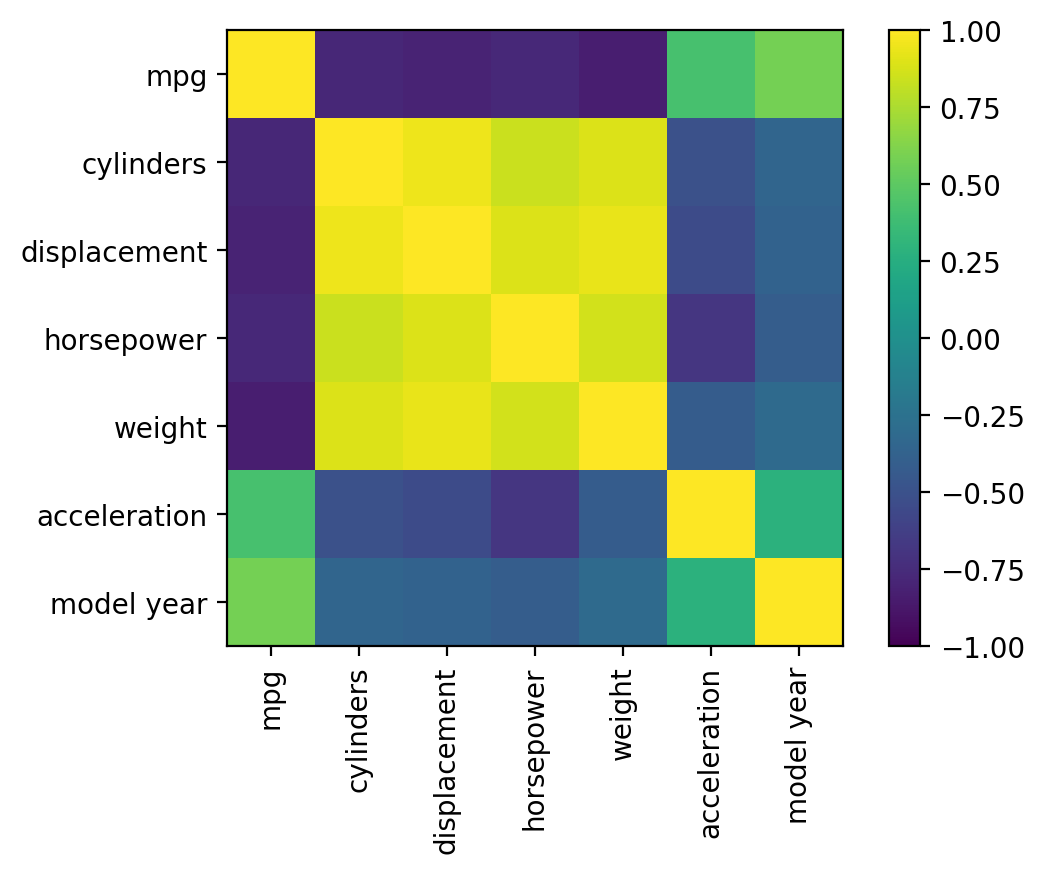

In [4]:
corrM = df.iloc[:,0:7].corr()
display(round(corrM,3))
plt.figure(figsize = (6,4), dpi=200)
plt.imshow(corrM)
plt.colorbar()
plt.clim([-1,1])
plt.xticks(np.arange(7), corrM.columns[:], rotation='vertical')
plt.yticks(np.arange(7), corrM.columns[:])
#sns.heatmap(corrM)
plt.show()

In [5]:
X = df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]]
y = df[["mpg"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # add Intercept term
model_time1 = sm.OLS(y_train, X_train)
results_time1 = model_time1.fit()
print(results_time1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     207.0
Date:                Thu, 16 May 2024   Prob (F-statistic):          1.94e-105
Time:                        22:23:10   Log-Likelihood:                -851.90
No. Observations:                 318   AIC:                             1718.
Df Residuals:                     311   BIC:                             1744.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2386      5.325     -3.425      0.0

In [6]:
X = df[["cylinders", "weight", "acceleration", "model year"]]
y = df[["mpg"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg_model = LinearRegression().fit(X_train, y_train) # y_hat = b0 + b1*TV
y_pred = reg_model.predict(X_train)
#Test MSE
y_pred = reg_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}") # 10.85

Test MSE: 8.87362603217148
